In [84]:
import pandas as pd
import numpy as np

In [74]:
#Flag to redo all splits

redo = False

## Reverse Split

In [78]:
bace_dataset = pd.read_csv('/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/bace/raw/bace.csv')

In [79]:

bace_dataset = bace_dataset.sample(frac=1).reset_index(drop=True)
data_len = len(bace_dataset)
train_length = int(data_len*0.8)

train_dataset = bace_dataset.iloc[:train_length]
test_dataset = bace_dataset.iloc[train_length:]

from generate_fingerprints import fingerprints_from_smiles_dataset

train_fingerprints = fingerprints_from_smiles_dataset(train_dataset,regression=True)
test_fingerprints = fingerprints_from_smiles_dataset(test_dataset,regression=True)

In [80]:
filepath = '/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/'
train_fingerprints.to_csv(filepath + 'bace_reverse_split_train.csv',index=False)
test_fingerprints.to_csv(filepath + 'bace_reverse_split_test.csv',index=False)

## Aletoric Dataset

In [88]:
train_dataset = pd.read_csv('/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_reverse_split_train.csv')
test_dataset = pd.read_csv('/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_reverse_split_test.csv')

In [90]:
train_dataset['pIC50'] = train_dataset['pIC50'] + np.random.normal(loc=0,scale=train_dataset['pIC50']/10)
test_dataset['pIC50'] = test_dataset['pIC50'] + np.random.normal(loc=0,scale=test_dataset['pIC50']/10)

In [92]:
train_filepath = '/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_fingerprints_reg_ale_train.csv'
test_filepath = '/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_fingerprints_reg_ale_test.csv'
if redo:
    train_fingerprints.to_csv(train_filepath, index=False)
    test_fingerprints.to_csv(test_filepath,index=False)

## Epistemic Dataset

In [100]:
bace_dataset = pd.read_csv('/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/bace/raw/bace.csv')

In [101]:
ood_samples = bace_dataset[(bace_dataset['pIC50']>9) | (bace_dataset['pIC50']<4)]
in_dist_samples =  bace_dataset[(bace_dataset['pIC50']<=9) & (bace_dataset['pIC50']>=4)]

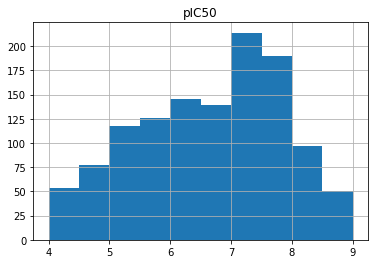

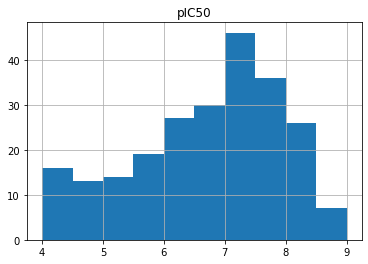

In [102]:

in_dist_samples =in_dist_samples.sample(frac=1).reset_index(drop=True)



train_length = 1210

train_dataset =in_dist_samples.iloc[:train_length]
test_dataset =in_dist_samples.iloc[train_length:]

train_dataset.hist('pIC50')
test_dataset.hist('pIC50')

In [103]:
test_dataset = pd.concat([test_dataset,ood_samples])

array([[<AxesSubplot:title={'center':'pIC50'}>]], dtype=object)

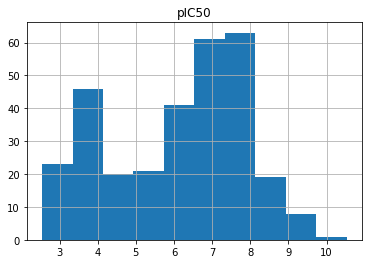

In [104]:
test_dataset.hist('pIC50')

In [105]:
from generate_fingerprints import fingerprints_from_smiles_dataset

train_fingerprints = fingerprints_from_smiles_dataset(train_dataset,regression=True)
test_fingerprints = fingerprints_from_smiles_dataset(test_dataset,regression=True)

In [106]:
if redo:
    train_filepath = '/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_fingerprints_reg_epi_train.csv'
    test_filepath = '/home/rajeckidoyle/Documents/Classification/BACE_Classification/regressionandunccertainty/fingerprints/bace_fingerprints_reg_epi_test.csv'

    train_fingerprints.to_csv(train_filepath, index=False)
    test_fingerprints.to_csv(test_filepath,index=False)